<a href="https://colab.research.google.com/github/ziyueluocs/torch-tutorial/blob/main/Training_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Determine the training device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"Training device is {device}.")

Training device is cuda:0.


In [2]:
# Data Preparation

transform = transforms.Compose([
    transforms.ToTensor(),	# Converts a PIL Image or numpy.ndarray to a tensor.
    transforms.Normalize((0.5,), (0.5,))	#  Normalizes a tensor with mean and standard deviation.
])

torch.manual_seed(1024) # Fix random seed

# Downloads the Fashion-MNIST dataset.
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# Provides an iterable over the given dataset.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 26421880/26421880 [00:00<00:00, 115195484.72it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 112438585.43it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 69440809.09it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 21965693.79it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



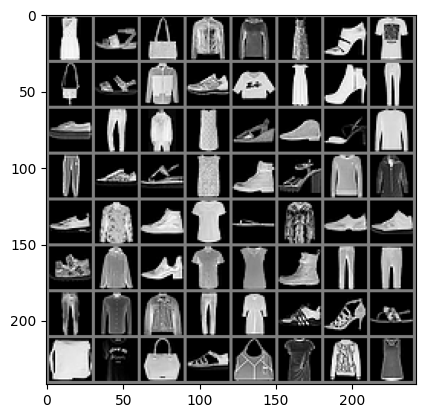

Categories for the first row:
Dress, Sandal, Bag, Coat, Pullover, Dress, Ankle boot, T-shirt/top


In [3]:
# Let us print some samples in the dataset
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('Categories for the first row:')
print(', '.join(f'{classes[labels[j]]}' for j in range(8)))

In [4]:
# Define the model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleCNN()
net = net.to(device)  # move the model to the training device
net

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [5]:
# Define the loss function
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
# Training
import time

for epoch in range(10):  # loop over the dataset 10 times
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        start_time = time.time()
        inputs, labels = data	# get the training data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()	# clear the gradients

        outputs = net(inputs)	# forward computation
        loss = criterion(outputs, labels)	# compute the loss
        loss.backward()	# backward computation to derive the gradients
        optimizer.step()	# apply the gradients

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(
                f'[Epoch {epoch + 1}, Batch {i + 1}] '
                f'loss: {running_loss / 100:.3f}, '
                f'step time: {(time.time() - start_time) * 1000:.2f}ms'
            )
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Batch 100] loss: 2.216, step time: 10.26ms
[Epoch 1, Batch 200] loss: 1.641, step time: 4.02ms
[Epoch 1, Batch 300] loss: 0.934, step time: 3.27ms
[Epoch 1, Batch 400] loss: 0.740, step time: 2.87ms
[Epoch 1, Batch 500] loss: 0.668, step time: 2.90ms
[Epoch 1, Batch 600] loss: 0.621, step time: 2.93ms
[Epoch 1, Batch 700] loss: 0.583, step time: 3.00ms
[Epoch 1, Batch 800] loss: 0.558, step time: 2.96ms
[Epoch 1, Batch 900] loss: 0.552, step time: 3.06ms
[Epoch 2, Batch 100] loss: 0.540, step time: 3.63ms
[Epoch 2, Batch 200] loss: 0.524, step time: 2.80ms
[Epoch 2, Batch 300] loss: 0.518, step time: 2.72ms
[Epoch 2, Batch 400] loss: 0.491, step time: 2.84ms
[Epoch 2, Batch 500] loss: 0.482, step time: 2.77ms
[Epoch 2, Batch 600] loss: 0.464, step time: 2.89ms
[Epoch 2, Batch 700] loss: 0.466, step time: 2.95ms
[Epoch 2, Batch 800] loss: 0.452, step time: 3.13ms
[Epoch 2, Batch 900] loss: 0.456, step time: 2.82ms
[Epoch 3, Batch 100] loss: 0.443, step time: 2.81ms
[Epoch 3, B

In [7]:
# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 88.11%


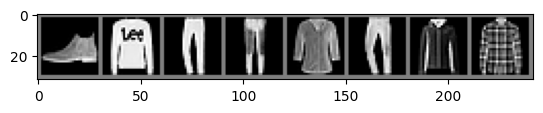

GroundTruth:	 Ankle boot,	Pullover,	Trouser,	Trouser,	Shirt,	Trouser,	Coat,	Shirt
Predicted:	 Ankle boot,	Pullover,	Trouser,	Trouser,	Shirt,	Trouser,	Coat,	Shirt


In [8]:
# Let's visualize the results

dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)

# Print images
imshow(torchvision.utils.make_grid(images[:8].cpu()))
print('GroundTruth:\t', ',\t'.join(f'{classes[labels[j]]}' for j in range(8)))

# Predict
outputs = net(images[:8])
_, predicted = torch.max(outputs, 1)

print('Predicted:\t', ',\t'.join(f'{classes[predicted[j]]}' for j in range(8)))